# DeepLearning ( TensorFlow )
* https://www.tensorflow.org/api_docs/python/tf

### Netural Network
- features(x) -> neuron -> target(y)
    - ex) 주택 가격  
    features(크기, 위치, 형태, ..) -> neuron(가중치, 그래프, 관계) -> target(가격)

## Sequential

### Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow
import tensorflow as tf
from tensorflow import keras

import random as rd


In [ ]:
x = np.array(range(0,20))
y = x * 2 - 1

x, y

In [ ]:
x.shape, y.shape

In [ ]:
# kears 모델 클리어
keras.backend.clear_session()

# keras 모델 선언
model = keras.models.Sequential()

In [ ]:
# 모델 노드 조립
model.add(keras.layers.Input(shape=(1,)))
model.add(keras.layers.Dense(1))

# 컴파일
# loss : 예측값 평가 기준 
# optimizer : 
model.compile(loss='mse'
              , optimizer='adam')

In [ ]:
# epochs : 학습 횟수
# verbose : 학습 과정 표현
model.fit(x,y, epochs=10, verbose=1)

In [ ]:
pred = model.predict(x)
pred

### Logistic Regression

In [ ]:
x = np.array(range(0,40)) 
y = np.array([0, 1] * 20)
print(x)
print(y)

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(1,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy'
              , optimizer='adam'
              , metrics=['accuracy'])

In [ ]:
model.fit(x, y, epochs=10, verbose=1)

In [ ]:
pred = model.predict(x)
pred

In [ ]:
print(y)


## Functional

### Linear Regression

In [ ]:
x = np.array(range(0,20)) 
y = x * 2 -1

print(x)
print(y)

In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# 레이어들을 사슬로 연결하 듯이 연결!
input_layer = keras.layers.Input(shape=(1,))
output_layer = keras.layers.Dense(1)(input_layer)

# 모델의 시작과 끝을 지정
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

# 컴파일 해주렴
model.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
# 데이터를 넣어서 학습시키자!
model.fit(x, y, epochs=10, verbose=1)

In [ ]:
# 결과 출력해줘!
print(y)
print(model.predict(x).reshape(-1,) )

### Logistic Regression

In [ ]:
x = np.array(range(0,20)) 
y = np.array([0]*10 + [1]*10)

print(x)
print(y)

In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

# 레이어들을 사슬로 연결하 듯이 연결!
input_layer = keras.layers.Input(shape=(1,))
output_layer = keras.layers.Dense(1, activation='sigmoid')(input_layer)

# 모델의 시작과 끝을 지정
model = keras.models.Model(inputs=input_layer, outputs=output_layer)


# 컴파일 해주렴
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# 데이터를 넣어서 학습시키자!
model.fit(x, y, epochs=10, verbose=1)

# 결과 출력해줘!
print(y)
print(model.predict(x).reshape(-1,) )

### ANN / MNIST

In [ ]:
from sklearn.metrics import accuracy_score
import random as rd

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

In [ ]:
x_train

In [ ]:
id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {y_train[id]} 입니다.')

plt.imshow(x_train[id])
plt.show()

# print(x_train[id])

In [ ]:
x_train.shape[0], x_val.shape[0]

In [ ]:
# 3차원 -> 2차원
x_train = x_train.reshape([x_train.shape[0],-1])
x_val = x_val.reshape([x_val.shape[0],-1])

In [ ]:
x_train.shape, x_val.shape

In [ ]:
print(f'max : {x_train.max()} / min : {x_train.min()}')

In [ ]:
max_n, min_n = x_train.max(), x_train.min()

max_n, min_n

In [ ]:
(x_train[0] - min_n) / (max_n - min_n)

In [ ]:
x_train = (x_train - min_n) / (max_n - min_n)
x_val = (x_val - min_n) / (max_n - min_n)

In [ ]:
from keras.utils import to_categorical

In [ ]:
# one-hot encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)

y_train.shape, y_val.shape

In [ ]:
# ### Sequential API
# # 1. 세션 클리어
# keras.backend.clear_session()

# # 2. 모델 선언 : Sequential()
# model = keras.models.Sequential()

# # 3. 레이어 조립 : .add()
# model.add( keras.layers.Input(shape=(784,)) )
# model.add(keras.layers.Dense(256, activation='relu') )
# model.add(keras.layers.Dense(256, activation='relu') )
# model.add(keras.layers.Dense(256, activation='relu') )
# model.add( keras.layers.Dense(10, activation='softmax') )

# # 4. 컴파일
# model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
#               optimizer=keras.optimizers.Adam(0.01) )

In [ ]:
### Functional API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(784,))
hl = keras.layers.Dense(256, activation='relu')
hl = keras.layers.Dense(256, activation='relu')
hl = keras.layers.Dense(256, activation='relu')
ol = keras.layers.Dense(10, activation='softmax')(il)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.01) )

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', # 관측 대상
                   min_delta=0,        # 최소한 나빠지지 않으면 괜찮아
                   patience=5,         # 성능 개선되지 않는 걸 얼마나 참을래?
                   verbose=1,
                   restore_best_weights=True # 학습이 멈췄을 때, 최적의 가중치로 전환해줌
                   )

In [ ]:
model.fit(x_train, y_train, epochs=50, verbose=1,
          validation_split=0.2,    # Train data의 20%를 Validation data로!
          callbacks=[es]           # Early Stopping 적용
          )

In [ ]:
pred_train = model.predict(x_train)
pred_val = model.predict(x_val)


In [ ]:
pred_train.shape, pred_val.shape

In [ ]:
single_pred_train = pred_train.argmax(axis=1)
single_pred_val = pred_val.argmax(axis=1)
single_pred_train.shape, single_pred_val.shape

In [ ]:
y_val.argmax(axis=1)

In [ ]:
logi_train_accuracy = accuracy_score(y_train.argmax(axis=1), single_pred_train)
logi_train_accuracy

In [ ]:
logi_test_accuracy = accuracy_score(y_val.argmax(axis=1), single_pred_val)
logi_test_accuracy

In [ ]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(x_val.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1)
    # Display each image
    ax.imshow(x_val[index].reshape([28,-1]), cmap='gray' )
    
    predict_index = pred_val[index].argmax(axis=0)
    true_index = y_val[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

In [ ]:
model.evaluate(x_val, y_val)

### 참고) 3차원 array 스케일링

In [ ]:
import numpy as np

In [ ]:
n1 = np.array(
    [
        [
                       [0, 0],
                       [2,-1],
                       [1, 0],
                       [2, 2],
        ],
        [
                       [1, 1],
                       [3, 3],
                       [2,-1],
                       [1, 1],
        ],
        [
                       [2, 2],
                       [7,-1],
                       [8, 1],
                       [1, 0],
        ]
    ])

In [ ]:
num_sample   = n1.shape[0] # 3 (3개 샘플 데이터)
num_sequence = n1.shape[1] # 4 (4개 시계열 데이터)
num_feature  = n1.shape[2] # 2 (2개 Feature(미세먼지, 초미세먼지 증감))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# 시계열을 선회하면서 피팅합니다
for ss in range(num_sequence):
    print('ss', ss)
    print(n1[:, ss, :])
    print()
    scaler.partial_fit(n1[:, ss, :])

In [ ]:
# 스케일링(변환)합니다.
results = []
for ss in range(num_sequence):
    results.append(scaler.transform(n1[:, ss, :]).reshape(num_sample, 1, num_feature))

print(results)
print()

n1_scaled = np.concatenate(results, axis=1)
print(n1_scaled)

### 참고) tensorflow GPU

* https://afsdzvcx123.tistory.com/entry/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-Windows%EC%9C%88%EB%8F%84%EC%9A%B0-CUDA-cuDNN-%EC%84%A4%EC%B9%98%EB%B0%A9%EB%B2%95
* https://doitgrow.com/28

In [1]:
# GPU 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13427346610800829377
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254700544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7411534314026108379
physical_device_desc: "device: 0, name: Quadro T1000 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# # gpu 사용
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# cpu 사용
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

### ANN 한계

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

In [ ]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

In [ ]:
id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format( labels[test_y[id][0]] ))
plt.imshow(test_x[id])
plt.show()

In [ ]:
max_n, min_n = train_x.max(), train_x.min()

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [ ]:
train_x.shape, test_x.shape

In [ ]:
class_n = len(np.unique(train_y))
class_n

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_y.shape, test_y.shape

In [ ]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(32,32,3))
fl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(521, activation='relu')(fl)
hl = keras.layers.Dense(521, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
ol = keras.layers.Dense(10, activation='softmax')(hl)

model = keras.models.Model(il, ol)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

model.summary()

In [ ]:
call = keras.callbacks.EarlyStopping(verbose=1
                                    , patience=5
                                    , restore_best_weights=True)

In [ ]:
history = model.fit(train_x, train_y, validation_split=0.2, callbacks=[call],
                    epochs=50, verbose=1)

In [ ]:
performance_test = model.evaluate(test_x, test_y)

print('Test Loss : {:.6f},  Test Accuracy : {:.3f}%'.format(performance_test[0], performance_test[1]*100))

In [ ]:
if not isinstance(history, dict):
    history = history.history
history.keys()

In [ ]:
plt.plot(history['loss'])
plt.plot(history['accuracy'])
plt.plot(history['val_loss'])
plt.plot(history['val_accuracy'])

plt.title('Training vs Validation')
plt.xlabel('Epoch')
plt.legend(history.keys(), loc=0)
plt.show()

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)


print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

In [ ]:
id = rd.randrange(0,10000)

print('id = {}'.format(id))
print('다음 그림은 {} 입니다.'.format(labels[test_y.argmax(axis=1)[id]] ))
print('모델의 예측 : {}'.format(labels[single_pred_test[id]] ))

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob) :
    prob_dict[ labels[idx] ] = prob

print('모델의 카테고리별 확률 : ')
print(prob_dict)

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([32,32,-1]))
plt.show()

### Multi Input Layer

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

x = iris.data
y = iris.target

In [ ]:
x = pd.DataFrame(x, columns=iris.feature_names)
x

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.1)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
x_train_l = x_train[['sepal length (cm)', 'petal length (cm)']]
x_train_w = x_train[['sepal width (cm)', 'petal width (cm)']]

In [ ]:
x_val_l = x_val[['sepal length (cm)', 'petal length (cm)']]
x_val_w = x_val[['sepal width (cm)', 'petal width (cm)']]

In [ ]:
len_y = len(set(y))
len_y

In [ ]:
y_train = to_categorical(y_train, len_y)
y_val = to_categorical(y_val, len_y)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

In [ ]:
keras.backend.clear_session()

il_l = keras.layers.Input(shape=(2,))
hl_l = keras.layers.Dense(2, activation='relu')(il_l)

il_w = keras.layers.Input(shape=(2,))
hl_w = keras.layers.Dense(2, activation='relu')(il_w)

# 2개의 Input 연결
cl = keras.layers.Concatenate()([hl_l, hl_w])
ol = keras.layers.Dense(3, activation='softmax')(cl)

model = keras.models.Model([il_l, il_w], ol)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
es = keras.callbacks.EarlyStopping(patience=5,
                                    verbose=1,
                                    restore_best_weights=True)

In [ ]:
model.fit([x_train_l, x_train_w], y_train, validation_split=0.1,
          epochs=1000, verbose=1, callbacks=[es])

In [ ]:
model.evaluate([x_val_l, x_val_w], y_val)

In [ ]:
pred = model.predict([x_val_l, x_val_w])
pred.argmax(1)

In [ ]:
y_val.argmax(1)

### CNN ( Convolutional Neural Networks )

#### Convolution
- param
    - filters : depth. 필터 map 수
    - kernel_size : 탐색 filter 사이즈
    - strides : 간격
    - padding : default valid. 사이드 0 추가(same)
    - activation
    - data_format, dilation_rate, groups, use_bias, kernel_initializer, bias_initializer, activity_regularizer, kernel_constraint, bias_constraint

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow
import tensorflow as tf
from tensorflow import keras

import random as rd


In [4]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [5]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [6]:
labels = { 0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

labels

{0: 'Airplane',
 1: 'Automobile',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

9147 Truck


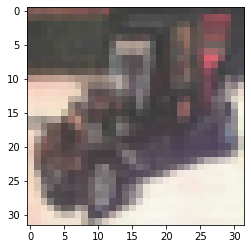

In [7]:
idx = rd.randrange(0,10000)

print(idx, labels[test_y[idx][0]])
plt.imshow(test_x[idx])
plt.show()


In [8]:
max_x, min_x = train_x.max(), train_x.min()
max_x, min_x

(255, 0)

##### X scale

In [9]:
train_x = train_x / max_x
test_x = test_x / max_x

##### Y One-Hot Encoding

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
train_y = train_y.reshape(train_y.shape[0])
test_y = test_y.reshape(test_y.shape[0])

train_y.shape, test_y.shape

((50000,), (10000,))

In [12]:
len_y = len(set(train_y))

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [13]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


### DeepLearning Modeling

- Sequential

In [14]:
from tensorflow.keras.layers import *

In [15]:
Dropout?

Init signature: Dropout(rate, noise_shape=None, seed=None, **kwargs)
Docstring:     
Applies Dropout to the input.

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.
Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over
all inputs is unchanged.

Note that the Dropout layer only applies when `training` is set to True
such that no values are dropped during inference. When using `model.fit`,
`training` will be appropriately set to True automatically, and in other
contexts, you can set the kwarg explicitly to True when calling the layer.

(This is in contrast to setting `trainable=False` for a Dropout layer.
`trainable` does not affect the layer's behavior, as Dropout does
not have any variables/weights that can be frozen during training.)

>>> tf.random.set_seed(0)
>>> layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
>>> data = np.arange(10).reshape(5, 2).astype(np.float32

In [16]:
keras.backend.clear_session()

model = keras.models.Sequential()

# Input
model.add(Input((32,32,3)))

# model.add(Conv2D(filters=32,
#                 kernel_size=(3,3),
#                 strides=(1, 1),
#                 padding='same',
#                 data_format=None,
#                 dilation_rate=(1, 1),
#                 groups=1,
#                 activation='relu',
#                 use_bias=True,
#                 kernel_initializer='glorot_uniform',
#                 bias_initializer='zeros',
#                 kernel_regularizer=None,
#                 bias_regularizer=None,
#                 activity_regularizer=None,
#                 kernel_constraint=None,
#                 bias_constraint=None))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=32,
#                 kernel_size=(3,3),
#                 strides=(1, 1),
#                 padding='same',
#                 data_format=None,
#                 dilation_rate=(1, 1),
#                 groups=1,
#                 activation='relu',
#                 use_bias=True,
#                 kernel_initializer='glorot_uniform',
#                 bias_initializer='zeros',
#                 kernel_regularizer=None,
#                 bias_regularizer=None,
#                 activity_regularizer=None,
#                 kernel_constraint=None,
#                 bias_constraint=None))
# model.add(BatchNormalization())

# model.add(Dropout(0.5))
# model.add(MaxPool2D((2,2)))

# model.add(Conv2D(filters=64,
#                 kernel_size=(3,3),
#                 strides=(1, 1),
#                 padding='same',
#                 data_format=None,
#                 dilation_rate=(1, 1),
#                 groups=1,
#                 activation='relu',
#                 use_bias=True,
#                 kernel_initializer='glorot_uniform',
#                 bias_initializer='zeros',
#                 kernel_regularizer=None,
#                 bias_regularizer=None,
#                 activity_regularizer=None,
#                 kernel_constraint=None,
#                 bias_constraint=None))
# model.add(BatchNormalization())
model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                strides=(1, 1),
                padding='same',
                data_format=None,
                dilation_rate=(1, 1),
                groups=1,
                activation='relu',
                use_bias=True,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(BatchNormalization())

model.add(Dropout(0.5))
# model.add(MaxPool2D((2,2)))

model.add(Flatten())

# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())

# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# output
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                        

In [17]:
keras.callbacks.EarlyStopping?

Init signature:
keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Docstring:     
Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the
metric to be monitored would be `'loss'`, and mode would be `'min'`. A
`model.fit()` training loop will check at end of every epoch whether
the loss is no longer decreasing, considering the `min_delta` and
`patience` if applicable. Once it's found no longer decreasing,
`model.stop_training` is marked True and the training terminates.

The quantity to be monitored needs to be available in `logs` dict.
To make it so, pass the loss or metrics at `model.compile()`.

Args:
  monitor: Quantity to be monitored.
  min_delta: Minimum change in the monitored quantity
      to qualify as an improvement, i.e. an absolute
      change of less than min_delta, will co

In [18]:
es = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
)

In [19]:
model.fit(train_x, train_y, epochs=500, verbose=1, validation_split=.2, callbacks=[es], batch_size=64)

Epoch 1/500


: 

: 

In [ ]:
import 